# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("/workspaces/MDST-Onboarding/data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
# Keep a clean copy
edu = df.copy()

# Target we will predict
TARGET = "AVG_MATH_8_SCORE"

# Quick look at missingness
edu[[ "STATE", "YEAR", "ENROLL", "TOTAL_EXPENDITURE", "TOTAL_REVENUE",
      "FEDERAL_REVENUE", "STATE_REVENUE", "LOCAL_REVENUE",
      "AVG_MATH_4_SCORE", "AVG_READING_4_SCORE", "AVG_READING_8_SCORE", TARGET
    ]].isna().mean().sort_values(ascending=False).head(12)

AVG_READING_8_SCORE    0.672303
AVG_MATH_4_SCORE       0.670554
AVG_MATH_8_SCORE       0.648980
AVG_READING_4_SCORE    0.620991
ENROLL                 0.286297
LOCAL_REVENUE          0.256560
TOTAL_EXPENDITURE      0.256560
STATE_REVENUE          0.256560
FEDERAL_REVENUE        0.256560
TOTAL_REVENUE          0.256560
STATE                  0.000000
YEAR                   0.000000
dtype: float64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [5]:
# @@@ 1
edu["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [6]:
# @@@ 2
mi_oh = edu[edu["STATE"].isin(["MICHIGAN", "OHIO"])].copy()
mi_oh.groupby("STATE")[TARGET].mean().sort_values(ascending=False)

STATE
OHIO        282.250000
MICHIGAN    276.166667
Name: AVG_MATH_8_SCORE, dtype: float64

Find the average for your chosen test across all states in 2019

In [7]:
# @@@ 3
edu.loc[edu["YEAR"] == 2019, TARGET].mean()

np.float64(281.2641509433962)

For each state, find a maximum value for your chosen test score

In [10]:
# @@@ 4
edu.groupby("STATE")[TARGET].max().sort_values(ascending=False)

STATE
MASSACHUSETTS           301.0
NEW_JERSEY              296.0
NEW_HAMPSHIRE           296.0
MINNESOTA               295.0
VERMONT                 295.0
MONTANA                 293.0
NORTH_DAKOTA            293.0
COLORADO                292.0
SOUTH_DAKOTA            291.0
PENNSYLVANIA            290.0
OHIO                    290.0
TEXAS                   290.0
WASHINGTON              290.0
KANSAS                  290.0
WISCONSIN               289.0
VIRGINIA                289.0
MAINE                   289.0
CONNECTICUT             289.0
INDIANA                 288.0
WYOMING                 288.0
MARYLAND                288.0
IDAHO                   287.0
UTAH                    286.0
MISSOURI                286.0
IOWA                    286.0
NEBRASKA                286.0
NORTH_CAROLINA          286.0
ILLINOIS                285.0
OREGON                  285.0
RHODE_ISLAND            284.0
DELAWARE                284.0
ALASKA                  283.0
ARIZONA                 283.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [9]:
# @@@ 5
edu = edu.dropna(subset=["ENROLL"]).copy()

edu["expenditure_per_student"] = edu["TOTAL_EXPENDITURE"] / edu["ENROLL"]
edu["revenue_per_student"] = edu["TOTAL_REVENUE"] / edu["ENROLL"]
edu["log_enroll"] = np.log1p(edu["ENROLL"])

edu[["STATE","YEAR","ENROLL","TOTAL_EXPENDITURE","expenditure_per_student","revenue_per_student","log_enroll",TARGET]].head()

,STATE,YEAR,ENROLL,TOTAL_EXPENDITURE,expenditure_per_student,revenue_per_student,log_enroll,AVG_MATH_8_SCORE
51,ALABAMA,1993,727716.0,2833433.0,3.893597,3.885295,13.497668,NaN
52,ALASKA,1993,121156.0,1126398.0,9.297088,9.833586,11.704843,NaN
53,ARIZONA,1993,676297.0,3623946.0,5.358513,5.068743,13.424389,NaN
54,ARKANSAS,1993,311432.0,1376067.0,4.418515,4.324890,12.648940,NaN
55,CALIFORNIA,1993,5129788.0,28110986.0,5.479951,5.466764,15.450575,NaN


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

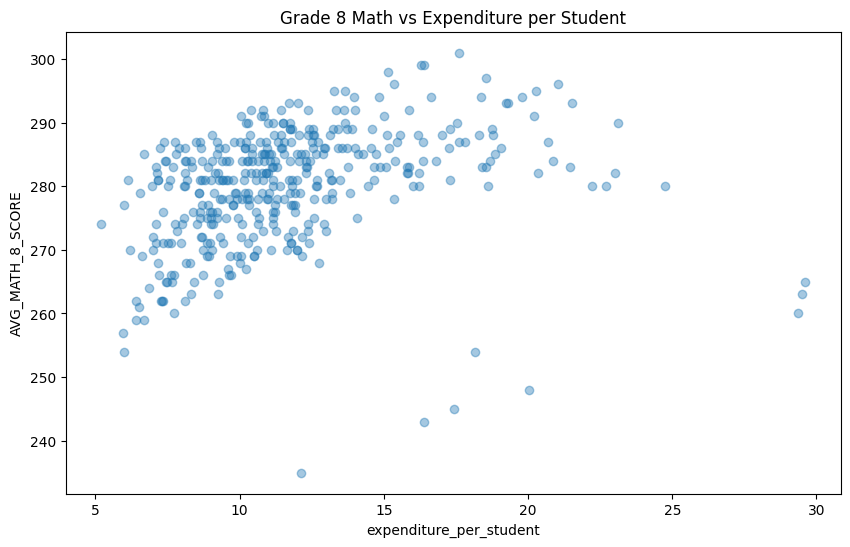

In [11]:
# @@@ 6
viz1 = edu.dropna(subset=[TARGET, "expenditure_per_student"]).copy()

plt.figure(figsize=(10,6))
plt.scatter(viz1["expenditure_per_student"], viz1[TARGET], alpha=0.4)
plt.xlabel("expenditure_per_student")
plt.ylabel("AVG_MATH_8_SCORE")
plt.title("Grade 8 Math vs Expenditure per Student")
plt.show()

**<CAPTION FOR VIZ 1>**

**Visualization 2**

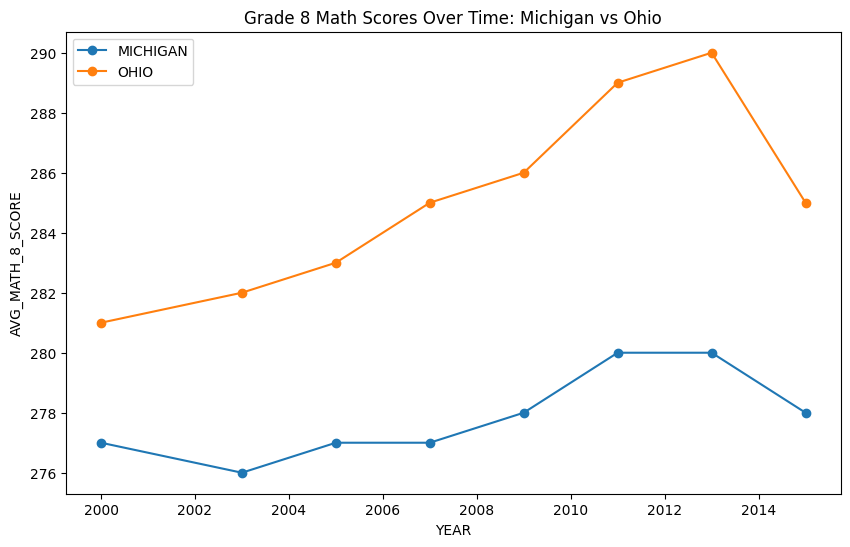

In [12]:
# @@@ 7
viz2 = edu[edu["STATE"].isin(["MICHIGAN","OHIO"])].dropna(subset=[TARGET]).copy()
viz2 = viz2.sort_values("YEAR")

plt.figure(figsize=(10,6))
for st in ["MICHIGAN","OHIO"]:
    sub = viz2[viz2["STATE"] == st]
    plt.plot(sub["YEAR"], sub[TARGET], marker="o", label=st)

plt.xlabel("YEAR")
plt.ylabel("AVG_MATH_8_SCORE")
plt.title("Grade 8 Math Scores Over Time: Michigan vs Ohio")
plt.legend()
plt.show()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [13]:
# @@@ 8

model_df = edu[edu["YEAR"] >= 2009].copy()

features = ["expenditure_per_student", "revenue_per_student", "log_enroll", "YEAR"]

model_df = model_df.dropna(subset=features + [TARGET])

X = model_df[features]
y = model_df[TARGET]

X.head(), y.head()

(     expenditure_per_student  revenue_per_student  log_enroll  YEAR
 867                10.481162             9.637520   13.522037  2009
 868                18.400534            16.577367   11.777111  2009
 869                 9.762931             8.970231   13.796638  2009
 870                10.575693            10.018785   13.069857  2009
 871                11.992978            11.863500   15.645554  2009,
 867    269.0
 868    283.0
 869    277.0
 870    276.0
 871    270.0
 Name: AVG_MATH_8_SCORE, dtype: float64)

In [17]:
# @@@ 9 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [18]:
# @@@ 10
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


In [19]:
# @@@ 11
model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0, random_state=42))
]) 

In [20]:
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('ridge', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None


In [21]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [22]:
# @@@ 12
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


MSE: 54.20555269819178
MAE: 5.806335855354713
R^2: 0.03115859558043188


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

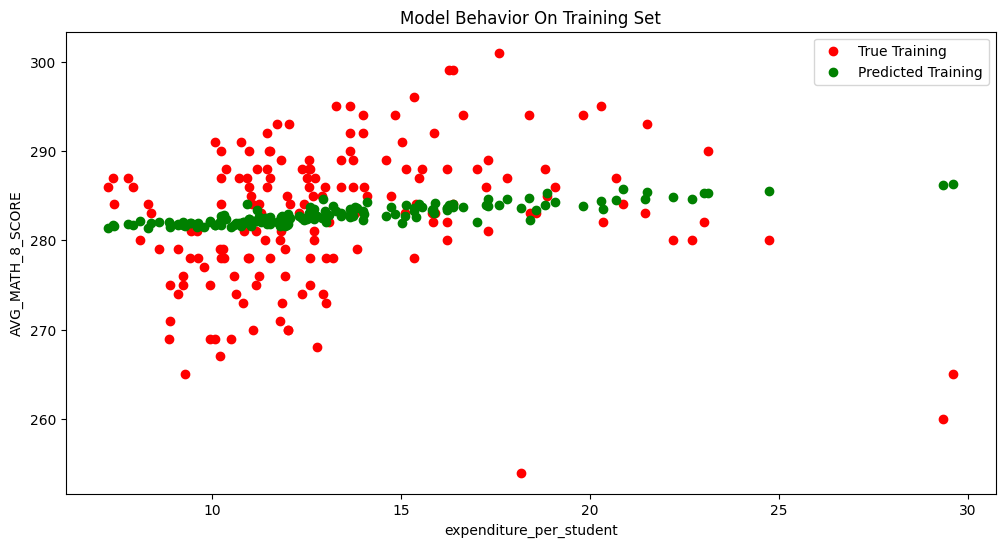

In [23]:
# @@@ 13

col_name = "expenditure_per_student"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color="red")
plt.scatter(X_train[col_name], model.predict(X_train), color="green")

plt.legend(["True Training","Predicted Training"])
plt.xlabel(col_name)
plt.ylabel("AVG_MATH_8_SCORE")
plt.title("Model Behavior On Training Set")
plt.show()

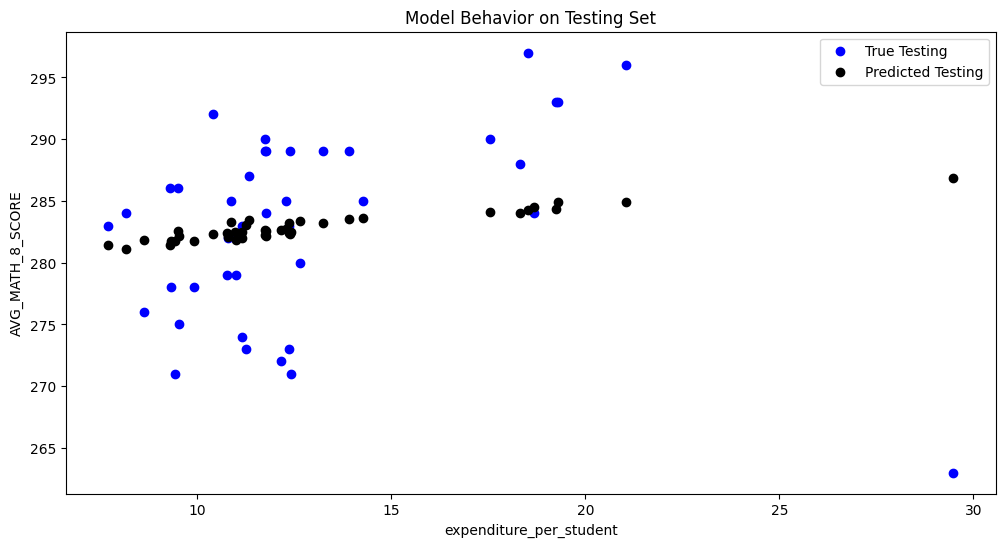

In [24]:
# @@@ 14


# @@@ 14
col_name = "expenditure_per_student"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color="blue")
plt.scatter(X_test[col_name], model.predict(X_test), color="black")

plt.legend(["True Testing","Predicted Testing"])
plt.xlabel(col_name)
plt.ylabel("AVG_MATH_8_SCORE")
plt.title("Model Behavior on Testing Set")
plt.show()